In [0]:
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
import random 
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical 

In [3]:
(xtr,ytr),(xts,yts)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [4]:
print(xtr.shape)
print(ytr.shape)

(60000, 28, 28)
(60000,)


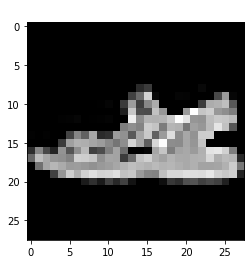

In [12]:
plt.imshow(xtr[1111],cmap='gray')
plt.title(ytr[1111],color='w')
plt.show()

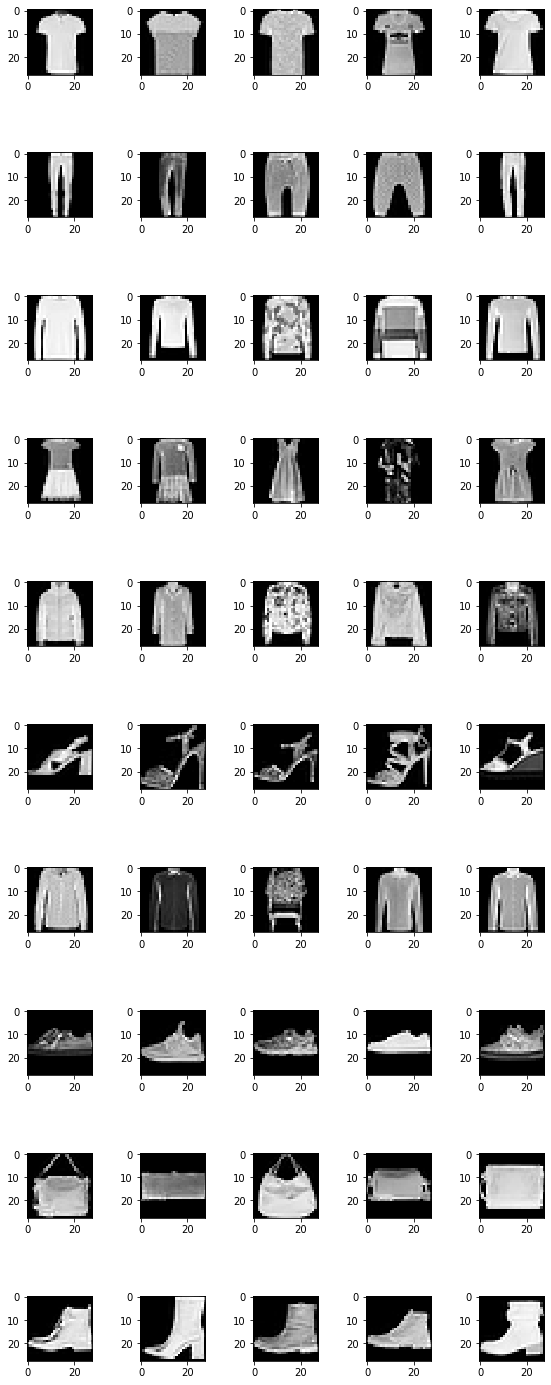

In [13]:
n_classes=10
n_cols=5
fig,axes=plt.subplots(nrows=n_classes,ncols=n_cols,figsize=(8,20))
fig.tight_layout()

for i in range(n_cols):
  for j in range(n_classes):
      selected_images=xtr[ytr==j]
      img=selected_images[random.randint(0,len(selected_images)-1),:,:]
      axes[j][i].imshow(img,cmap='gray')

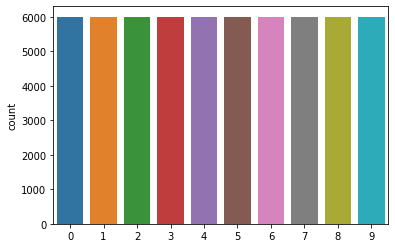

In [14]:
sns.countplot(ytr)
plt.show()

In [0]:
n_pixels=xtr.shape[1]*xtr.shape[2]
def preprocess(img):
  img=img.reshape(n_pixels)
  img=img/255
  return img

In [0]:
xtr=np.array(list(map(preprocess,xtr)))
xts=np.array(list(map(preprocess,xts)))

In [17]:
xtr.shape

(60000, 784)

In [18]:
xts.shape

(10000, 784)

In [0]:
ytr=to_categorical(ytr,10)
yts=to_categorical(yts,10)

In [20]:
model=Sequential()
model.add(Dense(128,input_dim=n_pixels,activation='sigmoid'))
model.add(Dense(256,activation='sigmoid'))
model.add(Dense(512,activation='sigmoid'))
model.add(Dense(n_classes,activation='softmax'))
model.compile(Adam(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 270,218
Trainable params: 270,218
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
h=model.fit(xtr,ytr,epochs=10,verbose=1,validation_data=(xts,yts))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 220us/step - loss: 0.8586 - acc: 0.6803 - val_loss: 0.6278 - val_acc: 0.7697
Epoch 2/10
60000/60000 [==============================] - 13s 219us/step - loss: 0.6125 - acc: 0.7774 - val_loss: 0.5805 - val_acc: 0.7962
Epoch 3/10
60000/60000 [==============================] - 13s 219us/step - loss: 0.5612 - acc: 0.8003 - val_loss: 0.5757 - val_acc: 0.7993
Epoch 4/10
60000/60000 [==============================] - 13s 220us/step - loss: 0.5403 - acc: 0.8080 - val_loss: 0.5770 - val_acc: 0.7909
Epoch 5/10
60000/60000 [==============================] - 13s 218us/step - loss: 0.5152 - acc: 0.8158 - val_loss: 0.5652 - val_acc: 0.7972
Epoch 6/10
60000/60000 [==============================] - 13s 217us/step - loss: 0.5025 - acc: 0.8215 - val_loss: 0.5656 - val_acc: 0.7947
Epoch 7/10
60000/60000 [==============================] - 13s 218us/step - loss: 0.4905 - acc: 0.8237 - val_loss: 0.

In [27]:

def addition(n): 
    return n + n 

numbers = (1, 2, 3, 4) 

result = map(addition, numbers) 
print(list(result))


[2, 4, 6, 8]
